In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from imblearn.over_sampling import RandomOverSampler



import seaborn as sns

import scipy
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import export_graphviz

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve, plot_confusion_matrix

from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()
seed = 42

In [2]:
url = 'https://raw.githubusercontent.com/N008Coder/Loan_Default_Predictor/main/Kaggle_loan_app/Loan_Default.csv'
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:

# drop unnecesssary columns
df = df.drop(columns=['year','ID','Gender', 'loan_limit', 'approv_in_adv', 'Credit_Worthiness', 'open_credit', 'Interest_rate_spread', 'Upfront_charges', 'Neg_ammortization', 'construction_type','lump_sum_payment', 'total_units', 'submission_of_application', 'LTV', 'Region', 'Security_Type', 'dtir1'])
df

,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,term,interest_only,property_value,occupancy_type,Secured_by,income,credit_type,Credit_Score,co-applicant_credit_type,age,Status
0,type1,p1,nob/c,116500,NaN,360.0,not_int,118000.0,pr,home,1740.0,EXP,758,CIB,25-34,1
1,type2,p1,b/c,206500,NaN,360.0,not_int,NaN,pr,home,4980.0,EQUI,552,EXP,55-64,1
2,type1,p1,nob/c,406500,4.560,360.0,not_int,508000.0,pr,home,9480.0,EXP,834,CIB,35-44,0
3,type1,p4,nob/c,456500,4.250,360.0,not_int,658000.0,pr,home,11880.0,EXP,587,CIB,45-54,0
4,type1,p1,nob/c,696500,4.000,360.0,not_int,758000.0,pr,home,10440.0,CRIF,602,EXP,25-34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,type1,p3,nob/c,436500,3.125,180.0,not_int,608000.0,pr,home,7860.0,CIB,659,EXP,55-64,0
148666,type1,p1,nob/c,586500,5.190,360.0,not_int,788000.0,ir,home,7140.0,CIB,569,CIB,25-34,0
148667,type1,p4,nob/c,446500,3.125,180.0,not_int,728000.0,pr,home,6900.0,CIB,702,EXP,45-54,0
148668,type1,p4,nob/c,196500,3.500,180.0,not_int,278000.0,pr,home,7140.0,EXP,737,EXP,55-64,0


In [4]:
# Create column with N/A count

df["NA count"] = 0
len(df.index)


148670

In [5]:
# add N/A column

for i in range(len(df.index)):
  df.loc[i, 31] = df.loc[i].isnull().sum()
df

,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,term,interest_only,property_value,occupancy_type,Secured_by,income,credit_type,Credit_Score,co-applicant_credit_type,age,Status,NA count,31
0,type1,p1,nob/c,116500,NaN,360.0,not_int,118000.0,pr,home,1740.0,EXP,758,CIB,25-34,1,0,1.0
1,type2,p1,b/c,206500,NaN,360.0,not_int,NaN,pr,home,4980.0,EQUI,552,EXP,55-64,1,0,3.0
2,type1,p1,nob/c,406500,4.560,360.0,not_int,508000.0,pr,home,9480.0,EXP,834,CIB,35-44,0,0,1.0
3,type1,p4,nob/c,456500,4.250,360.0,not_int,658000.0,pr,home,11880.0,EXP,587,CIB,45-54,0,0,1.0
4,type1,p1,nob/c,696500,4.000,360.0,not_int,758000.0,pr,home,10440.0,CRIF,602,EXP,25-34,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,type1,p3,nob/c,436500,3.125,180.0,not_int,608000.0,pr,home,7860.0,CIB,659,EXP,55-64,0,0,1.0
148666,type1,p1,nob/c,586500,5.190,360.0,not_int,788000.0,ir,home,7140.0,CIB,569,CIB,25-34,0,0,1.0
148667,type1,p4,nob/c,446500,3.125,180.0,not_int,728000.0,pr,home,6900.0,CIB,702,EXP,45-54,0,0,1.0
148668,type1,p4,nob/c,196500,3.500,180.0,not_int,278000.0,pr,home,7140.0,EXP,737,EXP,55-64,0,0,1.0


In [6]:
# review data
sum_stats=df.describe().round(0)
sum_stats

,loan_amount,rate_of_interest,term,property_value,income,Credit_Score,Status,NA count,31
count,148670.0,112231.0,148629.0,133572.0,139520.0,148670.0,148670.0,148670.0,148670.0
mean,331118.0,4.0,335.0,497893.0,6957.0,700.0,0.0,0.0,1.0
std,183909.0,1.0,58.0,359935.0,6497.0,116.0,0.0,0.0,1.0
min,16500.0,0.0,96.0,8000.0,0.0,500.0,0.0,0.0,1.0
25%,196500.0,4.0,360.0,268000.0,3720.0,599.0,0.0,0.0,1.0
50%,296500.0,4.0,360.0,418000.0,5760.0,699.0,0.0,0.0,1.0
75%,436500.0,4.0,360.0,628000.0,8520.0,800.0,0.0,0.0,2.0
max,3576500.0,8.0,360.0,16508000.0,578580.0,900.0,1.0,0.0,4.0


In [7]:
print(df.isnull().sum())

loan_type                       0
loan_purpose                  134
business_or_commercial          0
loan_amount                     0
rate_of_interest            36439
term                           41
interest_only                   0
property_value              15098
occupancy_type                  0
Secured_by                      0
income                       9150
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                           200
Status                          0
NA count                        0
31                              0
dtype: int64


In [8]:
# data clean up 
df = df.drop(columns=['rate_of_interest'])
df.round({"term":0, "property_value":0})
## ask group about replacing property value with avg of column 
# df =  
df.head()
df.dtypes

loan_type                    object
loan_purpose                 object
business_or_commercial       object
loan_amount                   int64
term                        float64
interest_only                object
property_value              float64
occupancy_type               object
Secured_by                   object
income                      float64
credit_type                  object
Credit_Score                  int64
co-applicant_credit_type     object
age                          object
Status                        int64
NA count                      int64
31                          float64
dtype: object

In [9]:

# df = df.astype({'term':'float', 'loan_amount':'float','property_value':'float','income':'float','Credit_Score':'float'})
# df.dtypes

In [10]:
# Main stats of categoric attributes:
print(df.describe(include=[np.object]))

# define categories
cats = df.dtypes[df.dtypes=='object'].index
cats

       loan_type loan_purpose business_or_commercial interest_only  \
count     148670       148536                 148670        148670   
unique         3            4                      2             2   
top        type1           p3                  nob/c       not_int   
freq      113173        55934                 127908        141560   

       occupancy_type Secured_by credit_type co-applicant_credit_type     age  
count          148670     148670      148670                   148670  148470  
unique              3          2           4                        2       7  
top                pr       home         CIB                      CIB   45-54  
freq           138201     148637       48152                    74392   34720  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Index(['loan_type', 'loan_purpose', 'business_or_commercial', 'interest_only',
       'occupancy_type', 'Secured_by', 'credit_type',
       'co-applicant_credit_type', 'age'],
      dtype='object')

In [11]:
# Type of variables:
df.dtypes.sort_values(ascending=True)


Status                        int64
loan_amount                   int64
Credit_Score                  int64
NA count                      int64
31                          float64
term                        float64
property_value              float64
income                      float64
age                          object
co-applicant_credit_type     object
loan_type                    object
occupancy_type               object
interest_only                object
business_or_commercial       object
loan_purpose                 object
credit_type                  object
Secured_by                   object
dtype: object

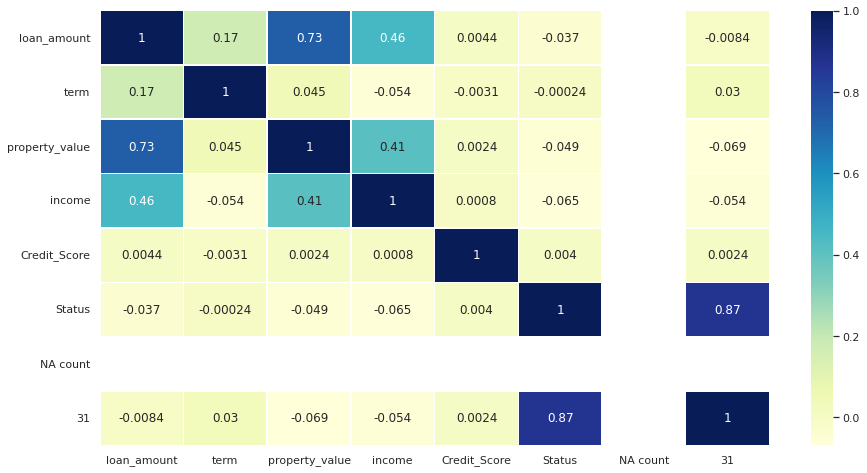

In [12]:
# correlation matrix

core = df.corr()
sns.set(rc = {'figure.figsize':(15,8)}, style="whitegrid")
sns.heatmap(
    core, 
    xticklabels = core.columns, 
    yticklabels = core.columns,
    annot=True,
    linewidth=.5,
    cmap="YlGnBu"
)


0    112031
1     36639
Name: Status, dtype: int64
count     148470
unique         7
top        45-54
freq       34720
Name: age, dtype: object
0         25-34
1         55-64
2         35-44
3         45-54
4         25-34
          ...  
148665    55-64
148666    25-34
148667    45-54
148668    55-64
148669    45-54
Name: age, Length: 148670, dtype: object


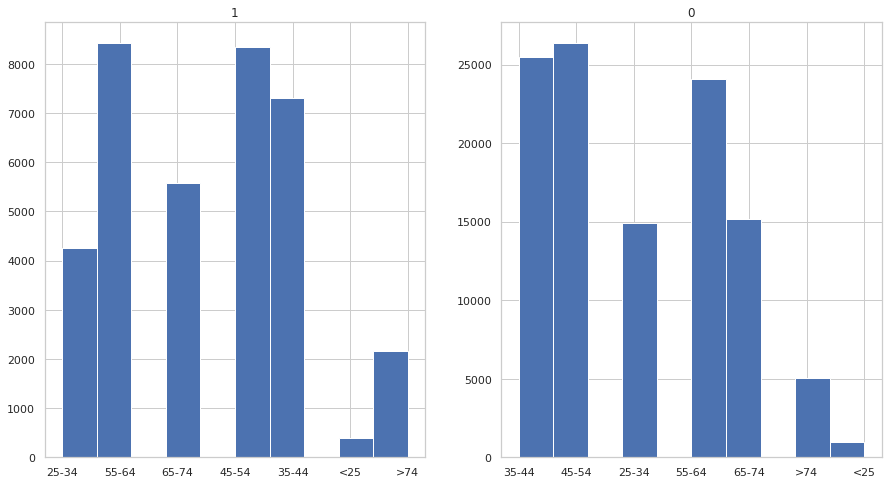

In [13]:
# year + status
print(df.Status.value_counts())
print(df.age.describe())

print(df['age'])

# replace age ranges with group #
# age group 1 = 25-34
# age group 2 = 35-44
# age group 3 = 45-54
# age group 4 = 55-64



# change type
# df = df.astype({'Status':'float'})


# plot 
fig, ax=plt.subplots(1, 2)
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].age.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

count     148670.0
mean      331118.0
std       183909.0
min        16500.0
25%       196500.0
50%       296500.0
75%       436500.0
max      3576500.0
Name: loan_amount, dtype: float64

The max loan amount is $3576500.00 and the min loan amount is $16500.00


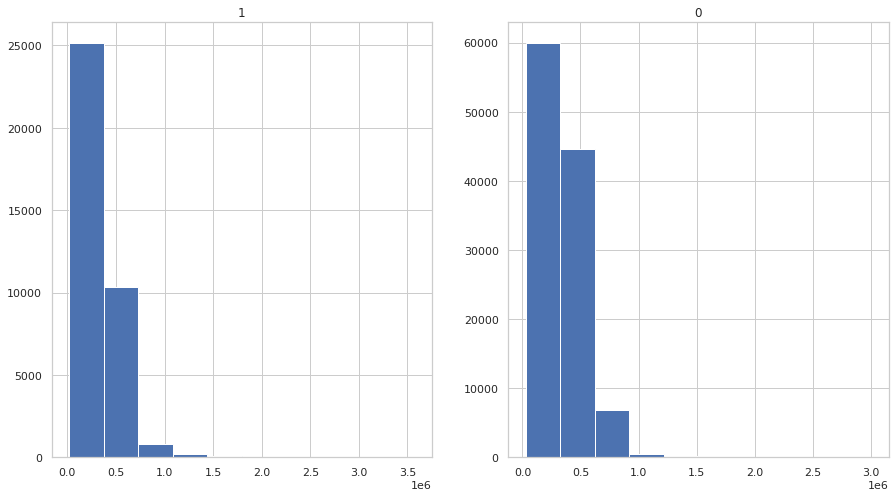

In [14]:
# status + loan amount
display(df['loan_amount'].describe().round())

print("The max loan amount is $3576500.00 and the min loan amount is $16500.00"  )

# plot 
fig, ax=plt.subplots(1, 2)
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].loan_amount.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

count     148536
unique         4
top           p3
freq       55934
Name: loan_purpose, dtype: object

The most common reason for a loan is p3


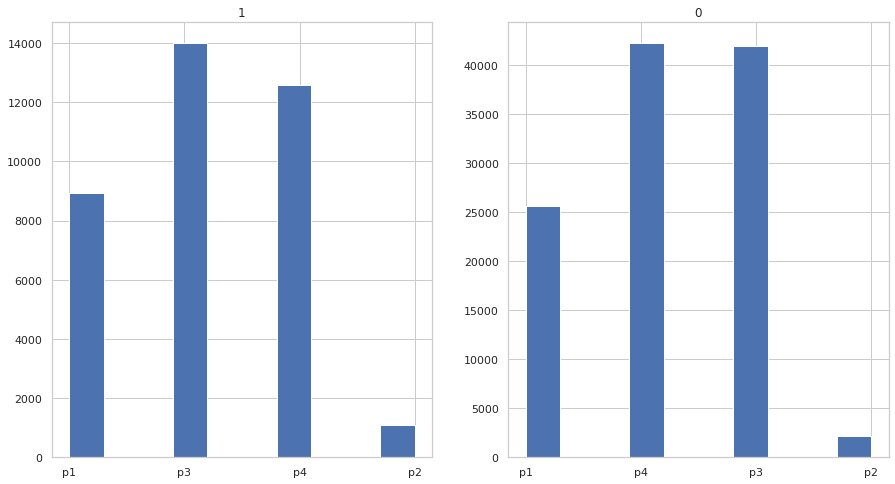

In [15]:
# status + loan_purpose
display(df['loan_purpose'].describe())

print("The most common reason for a loan is p3" )

# plot 
fig, ax=plt.subplots(1, 2)
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].loan_purpose.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

count     148670
unique         2
top        nob/c
freq      127908
Name: business_or_commercial, dtype: object

The most common type of loan is the nob/c loan


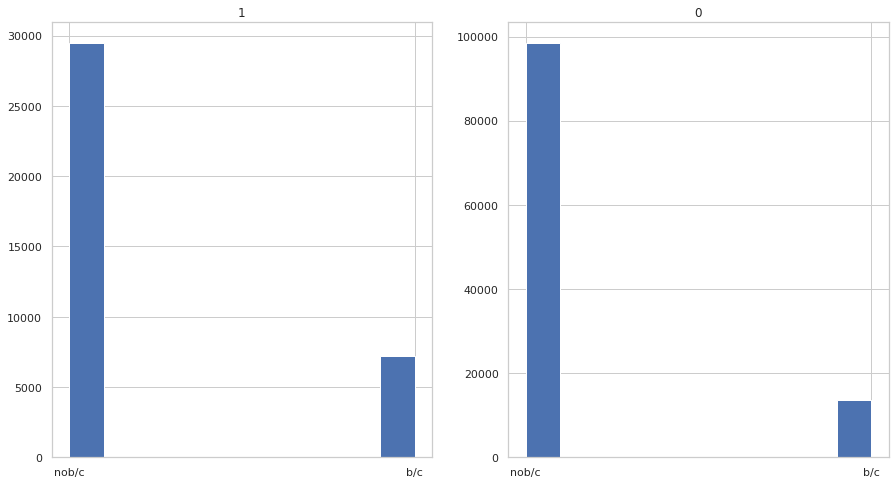

In [16]:
# status + business_or_commercial
display(df['business_or_commercial'].describe())

print("The most common type of loan is the nob/c loan" )

# plot 
fig, ax=plt.subplots(1, 2)
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].business_or_commercial.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

count    148629.000000
mean        335.136582
std          58.409084
min          96.000000
25%         360.000000
50%         360.000000
75%         360.000000
max         360.000000
Name: term, dtype: float64

The average term of a loan is 335.2 days. The min is 96 days and the max is 360 days.


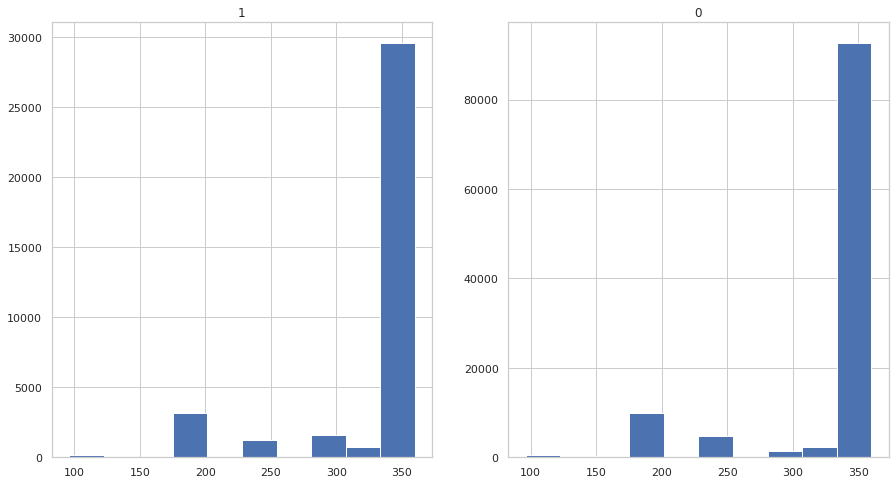

In [17]:
# status + term
display(df['term'].describe())

print("The average term of a loan is 335.2 days. The min is 96 days and the max is 360 days." )

# plot 
fig, ax=plt.subplots(1, 2)
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].term.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

count      148670
unique          2
top       not_int
freq       141560
Name: interest_only, dtype: object

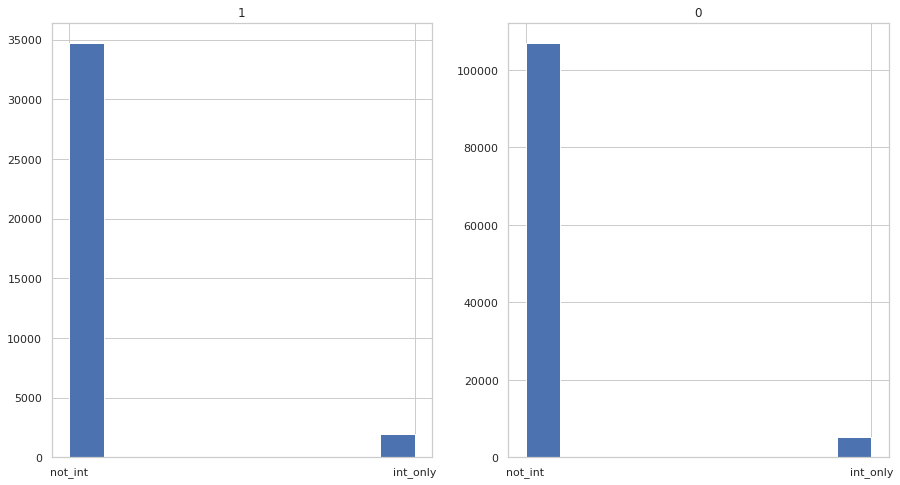

In [18]:
# status + interest_only
display(df['interest_only'].describe())

# print("The average term of a loan is 335.2 days. The min is 96 days and the max is 360 days." )

# plot 
fig, ax=plt.subplots(1, 2)
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].interest_only.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

count      133572.0
mean       497893.0
std        359935.0
min          8000.0
25%        268000.0
50%        418000.0
75%        628000.0
max      16508000.0
Name: property_value, dtype: float64

The average property value of the customer is $497,893.00


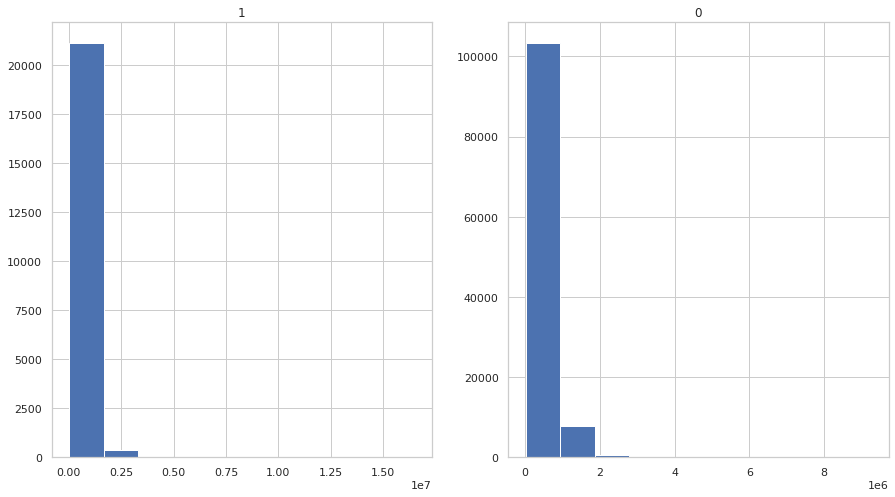

In [19]:
# status + property_value
display(df['property_value'].describe().round())

print("The average property value of the customer is $497,893.00" )

# plot 
fig, ax=plt.subplots(1, 2)
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].property_value.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

count     148670
unique         3
top           pr
freq      138201
Name: occupancy_type, dtype: object

The most common occupancy type is pr


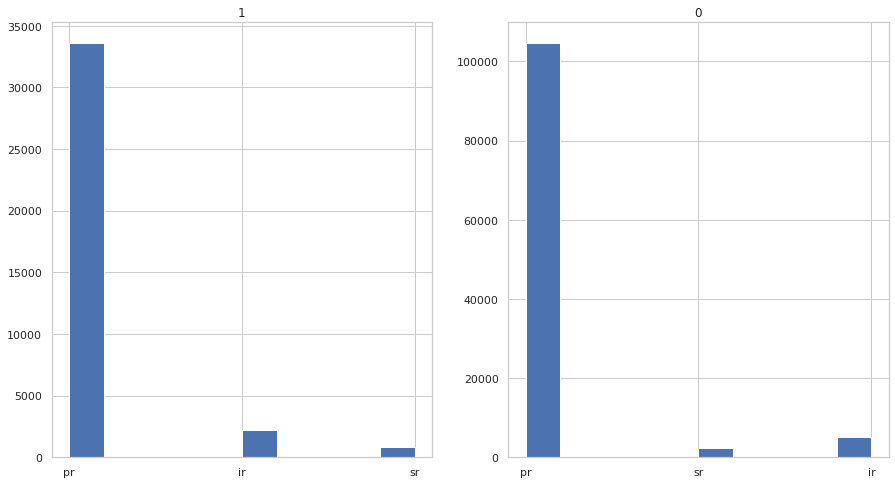

In [20]:
# status + occupancy_type
display(df['occupancy_type'].describe())

print("The most common occupancy type is pr" )

# plot 
fig, ax=plt.subplots(1, 2)
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].occupancy_type.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

count     148670
unique         2
top         home
freq      148637
Name: Secured_by, dtype: object

0

The most way people secure a loan is by using their house as collateral.


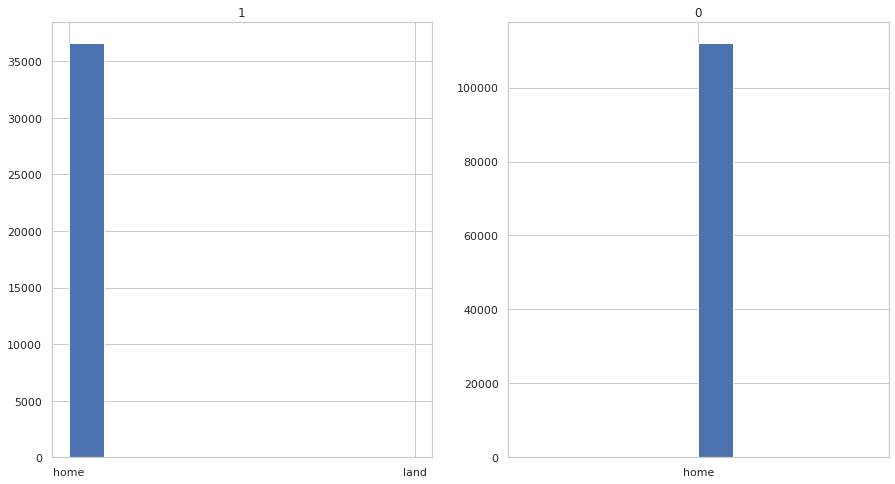

In [21]:
# status + Secured_by
display(df['Secured_by'].describe())
display(df['Secured_by'].isnull().sum())

print("The most way people secure a loan is by using their house as collateral." )

# plot 
fig, ax=plt.subplots(1, 2)
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].Secured_by.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

count    139520.000000
mean       6957.338876
std        6496.586382
min           0.000000
25%        3720.000000
50%        5760.000000
75%        8520.000000
max      578580.000000
Name: income, dtype: float64

9150

The average monthly income of the person requesting the loan is $6957.33.


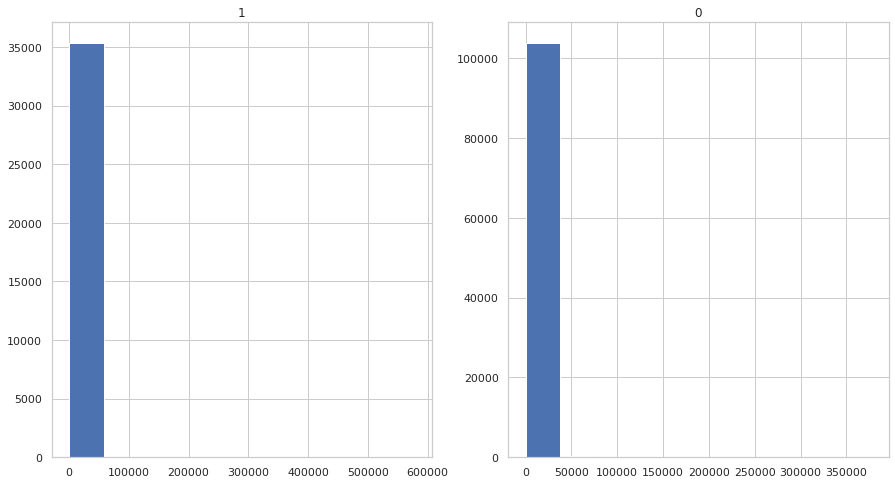

In [22]:
# status + income
display(df['income'].describe())
display(df['income'].isnull().sum())

print("The average monthly income of the person requesting the loan is $6957.33." )

# plot 
fig, ax=plt.subplots(1, 2)
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].income.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

count     148670
unique         4
top          CIB
freq       48152
Name: credit_type, dtype: object

0

The most common credit_type is CIB.


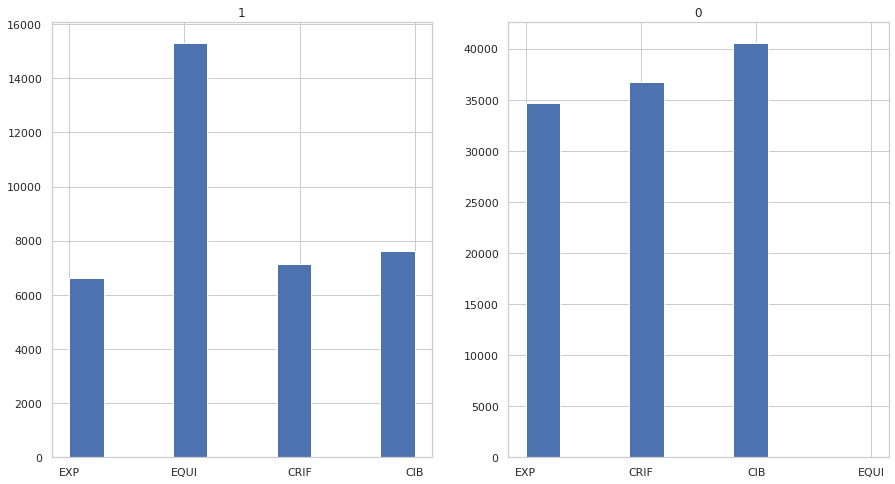

In [23]:

# status + credit_type
display(df['credit_type'].describe())
display(df['credit_type'].isnull().sum())

print("The most common credit_type is CIB." )

# plot 
fig, ax=plt.subplots(1, 2)
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].credit_type.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

count    148670.0
mean        700.0
std         116.0
min         500.0
25%         599.0
50%         699.0
75%         800.0
max         900.0
Name: Credit_Score, dtype: float64

0

The average Credit Score among applicants is 700.


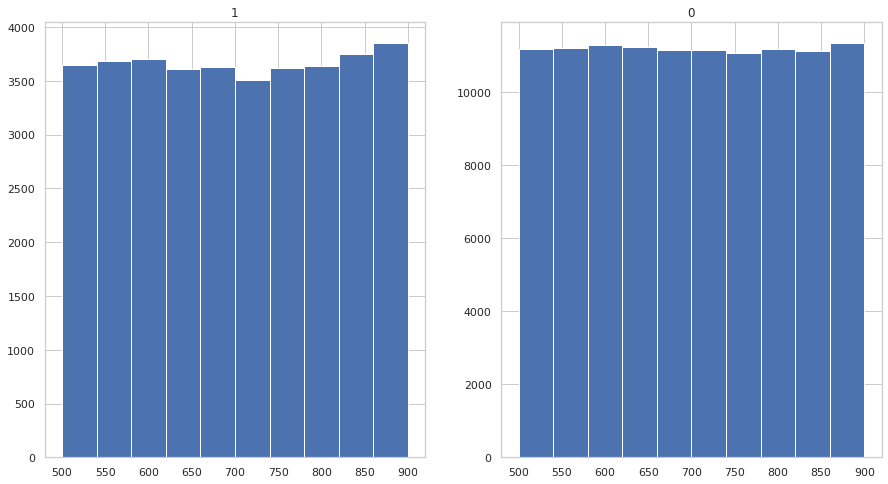

In [24]:

# status + Credit_Score
display(df['Credit_Score'].describe().round())
display(df['Credit_Score'].isnull().sum())

print("The average Credit Score among applicants is 700." )

# plot 
fig, ax=plt.subplots(1, 2)
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].Credit_Score.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

In [25]:
# change name of co-app credit type otherwise can't make figure out of it in the next step

df.rename(columns = {'co-applicant_credit_type':'co_applicant_credit_type'}, inplace = True)

count     148670
unique         2
top          CIB
freq       74392
Name: co_applicant_credit_type, dtype: object

0

The most common co-applicant credit type among applicants is CIB.


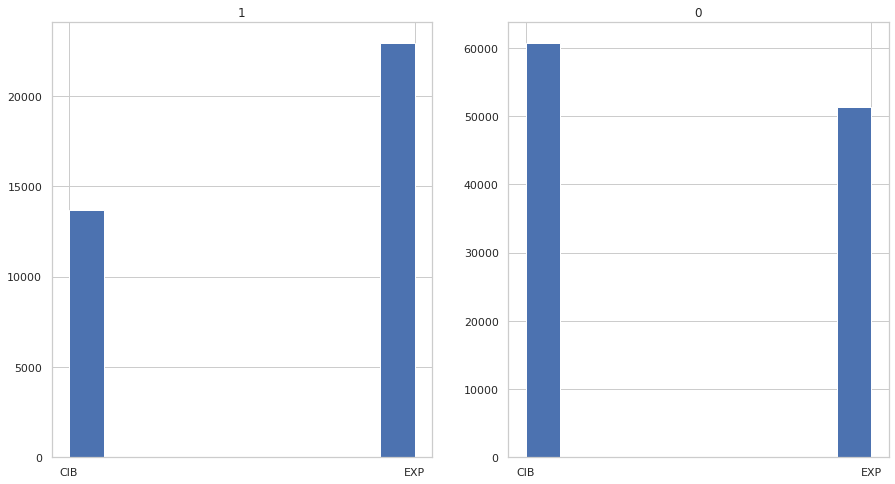

In [26]:


# status + co_applicant_credit_type
display(df['co_applicant_credit_type'].describe())
display(df['co_applicant_credit_type'].isnull().sum())

print("The most common co-applicant credit type among applicants is CIB." )

# plot 
fig, ax=plt.subplots(1, 2)
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].co_applicant_credit_type.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

In [27]:
# Type of variables:
print( df.dtypes.sort_values(ascending=True))


x = df["loan_amount"]
y = df[ "Credit_Score"]

xy = x.corr(y)
print(xy)             

yx = y.corr(x)
print(yx)

xys = x.corr(y, method='spearman')
print(xys)  # Spearman's rho

xyk = x.corr(y, method='kendall')
print(xyk) #Kendall's




Status                        int64
loan_amount                   int64
Credit_Score                  int64
NA count                      int64
31                          float64
term                        float64
property_value              float64
income                      float64
age                          object
co_applicant_credit_type     object
loan_type                    object
occupancy_type               object
interest_only                object
business_or_commercial       object
loan_purpose                 object
credit_type                  object
Secured_by                   object
dtype: object
0.004438286387009901
0.0044382863870099
0.004612210336209023
0.0031047984963710625


In [28]:
x = df["loan_amount"]
y = df[ "Status"]

xy = x.corr(y)
print(xy)             

yx = y.corr(x)
print(yx)

xys = x.corr(y, method='spearman')
print(xys)  # Spearman's rho

xyk = x.corr(y, method='kendall')
print(xyk) #Kendall's



-0.036825275544374286
-0.03682527554437429
-0.06884161419818988
-0.056716892874696945


In [29]:
#x = df["loan_amount"]
#y = df[ "age"]

#xy = x.corr(y)
#print(xy)             

#yx = y.corr(x)
#print(yx)

#xys = x.corr(y, method='spearman')
#print(xys)  # Spearman's rho

#xyk = x.corr(y, method='kendall')
#print(xyk) #Kendall's



In [30]:
#df['term'] = df['term'].astype(str).apply(lambda x: x.replace('.0',''))
#df

  
#print()
  
# lets find out the data
# type after changing
#print(df.dtypes)

#df


#print(df['term'])


# Counting variables by type:
#df.dtypes.value_counts()



In [31]:
# General statistics
# def stats(x):
   # print(f"Variable: {x}")
   # print(f"Type of variable: {df[x].dtype}")
   # print(f"Total observations: {df[x].shape[0]}")
   # detect_null_val = df[x].isnull().values.any()
   # if detect_null_val:
     #   print(f"Missing values: {df[x].isnull().sum()} ({(df[x].isnull().sum() / df[x].isnull().shape[0] *100).round(2)}%)")
   # else:
    #    print(f"Missing values? {df[x].isnull().values.any()}")
    #print(f"Unique values: {df[x].nunique()}")
   # if df[x].dtype != "O":
    #    print(f"Min: {int(df[x].min())}")
    #    print(f"25%: {int(df[x].quantile(q=[.25]).iloc[-1])}")
     #   print(f"Median: {int(df[x].median())}")
     #   print(f"75%: {int(df[x].quantile(q=[.75]).iloc[-1])}")
      #  print(f"Max: {int(df[x].max())}")
     #   print(f"Mean: {df[x].mean()}")
      #  print(f"Std dev: {df[x].std()}")
      #  print(f"Variance: {df[x].var()}")
      #  print(f"Skewness: {scipy.stats.skew(df[x])}")
      #  print(f"Kurtosis: {scipy.stats.kurtosis(df[x])}")
      #  print("")
        
        # Percentiles 1%, 5%, 95% and 99%

  #  print("Percentiles 1%, 5%, 95%, 99%")
    #    print("")
  #  else:
      #  print(f"List of unique values: {df[x].unique()}")

In [32]:
def bar(x):
    ax = df[x].value_counts().plot(kind="bar", figsize=(6,5), fontsize=10, color=sns.color_palette("rocket"), table=False)
    

In [33]:
#for col in df.select_dtypes(include=["object"]).columns:
   # df['Credit_Score'].value_counts().plot(kind="bar", color=sns.color_palette("rocket"))
    
   # plt.xlabel("Credit Score", fontsize=10)
   # plt.xticks(rotation=90, horizontalalignment="center")
   # plt.ylabel("Count", fontsize=10)
   # plt.title(col, fontsize=10, loc="right")
   # plt.show()

# Histogram
def hist(x):
    plt.hist(df[x], bins=25)
    plt.title(x, fontsize=10, loc="right")
    plt.xlabel('Relative frequency')
    plt.ylabel('Absolute frequency')
    plt.show()
    

In [34]:
# Below are some quick examples.
# Correlation between two columns of DataFrame.
#df['term'] = df['term'].astype(int)
#df['Credit_Score'] = df['Credit_Score'].astype(int)
#print(df['Credit_Score'].isnull().sum())
# df['term'].isnull().sum()
corr=df['term'].corr(df['Credit_Score'])
#df

# Correlation between all the columns of DataFrame.
#df2=df.corr()

# Other example.
# df['Discount']=np.float64(df['Fee'])



In [35]:
# credit_score + age
# Compute the correlation between "credit_score" and "age"
col1, col2= "loan_amount", "Credit_Score"
corr = df[col1].corr(df[col2])
print(corr)


0.004438286387009901


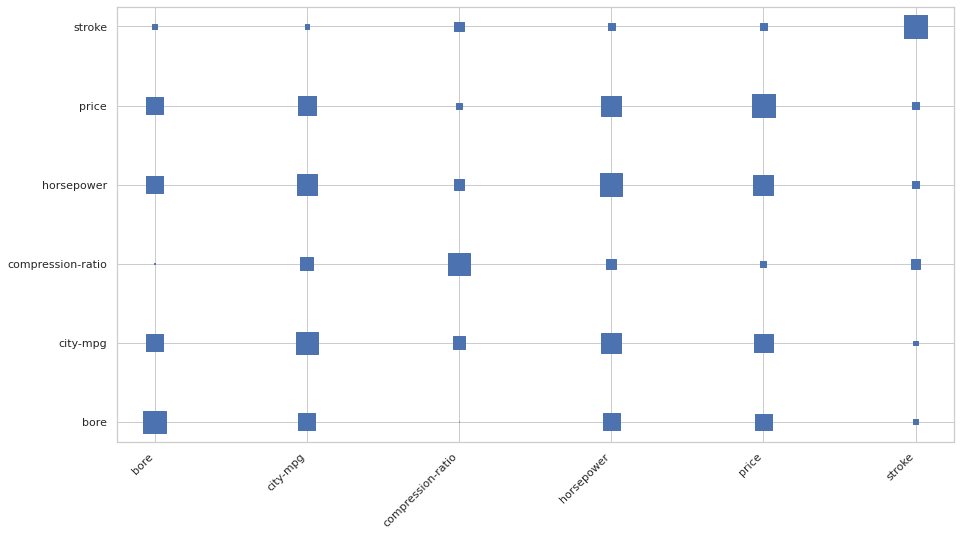

In [36]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')
columns = ['bore', 'stroke', 'compression-ratio', 'horsepower', 'city-mpg', 'price'] 
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

In [37]:
# df.Status.value_counts()
# df = df.drop(columns = ["rate_of_interest","Interest_rate_spread","Upfront_charges"])
# df

In [38]:
# df.dropna(inplace=True)

In [39]:
df.Status.value_counts()
# df = df.drop(columns = ["rate_of_interest","Interest_rate_spread","Upfront_charges"])
# df

0    112031
1     36639
Name: Status, dtype: int64

In [40]:
df["NA count"] = 0
len(df.index)

148670

In [41]:
for i in range(len(df.index)) :
    df.iloc[i, 31] = df.iloc[i].isnull().sum()
df


IndexError: ignored

In [ ]:
cats = df.dtypes[df.dtypes=='object'].index
cats

In [ ]:
cols = df.drop(columns = cats)
cols

In [ ]:
import seaborn as sns

In [ ]:
core = cols.corr()
sns.set(rc = {'figure.figsize':(15,8)}, style="whitegrid")
sns.heatmap(
    core, 
    xticklabels = core.columns, 
    yticklabels = core.columns,
    annot=True,
    linewidth=.5,
    cmap="YlGnBu"
)


In [ ]:
# model.predict([0, 0, 0, 0, 0, 0, 0, 0, 720]) => 0.8 high risk

In [ ]:
# model.predict([0, 0, 0, 0, 0, 0, 0, 0, 780]) => 0.69 low risk | 0.7 approve more loans -> generate more income & higher chance of making mistake -> losses

In [ ]:
# accuracy score
# approving a loan when it should have been rejected

# True = high risk
# recall to be high - TP / (TP+FN)
# precision will be lower - TP / (TP+FP)

In [ ]:
# model.predict([0, 0, 0, 0, 0, 0, 0, 0, 750])

In [ ]:
test = df.dropna()
test.Status.value_counts()

In [ ]:
cols.isnull().sum()

In [ ]:
for i in cols:
    print(cols['Status'].corr(df[i]))

In [ ]:
#df.isnull().sum()

In [ ]:
#cols['rate_of_interest'].fillna(cols['rate_of_interest'].mean(), inplace = True)
#cols['Interest_rate_spread'].fillna(cols['Interest_rate_spread'].mean(), inplace = True)
#cols['Upfront_charges'].fillna(cols['Upfront_charges'].mean(), inplace = True)
cols['term'].fillna(cols['term'].mean(), inplace = True)
cols['property_value'].fillna(cols['property_value'].mean(), inplace = True)
cols['income'].fillna(cols['income'].mean(), inplace = True)
cols['LTV'].fillna(cols['LTV'].mean(), inplace = True)
cols['dtir1'].fillna(cols['dtir1'].mean(), inplace = True)

In [ ]:
cols.isnull().sum()

In [ ]:
#cols['rate_of_interest'].fillna(cols['rate_of_interest'].mean(), inplace = True)

In [ ]:
for i in cols:
    print(cols['Status'].corr(df[i]))


In [ ]:
df.isna().head(10)#.sum()

In [ ]:
df.Status.value_counts()

In [ ]:
cats = list(df.dtypes[df.dtypes == 'object'].index)

In [ ]:
cats

In [ ]:
for i in cats:
    print(df[i].value_counts())

In [ ]:
enc = OneHotEncoder(sparse=False)


In [ ]:
cats_enc = enc.fit_transform(df[cats])

In [ ]:
cats_enc

In [ ]:
df_enc = pd.DataFrame(cats_enc,
                     columns = enc.get_feature_names(cats))
df_enc.isnull().sum()

In [ ]:
df_final = pd.concat([cols, df_enc], axis=1)

In [ ]:
# good_loan = df_final[df_final.Status==0][:36639].copy()
# bad_loan = df_final[df_final.Status==1].copy()
# trimmed_loan = pd.concat([good_loan, bad_loan])
# trimmed_loan

In [ ]:
# y = trimmed_loan.Status
# y
# X = trimmed_loan.drop(columns = 'Status')
# X.isnull().sum()

In [ ]:
y = df_final.Status
y
X = df_final.drop(columns = 'Status')
X.isnull().sum()

In [ ]:
df_final

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
X_train_scaled

In [ ]:
# ros = RandomOverSampler()

In [ ]:
# ros.fit_resample()
# X_train_scaled = ros.fit_resample(X_train_scaled)

In [ ]:
#ros.fit_resample(X_train_scaled, y_train)

In [ ]:
X_train_scaled


In [ ]:
pd.DataFrame(X_train_scaled)

In [ ]:
y_train

In [ ]:
help(tf.keras.activations.softplus)

In [ ]:
nn = Sequential()

In [ ]:
hidden_nodes1 = 4
hidden_nodes2 = 2
hidden_nodes3 = 1
final_nodes = 1
num_features = len(X_train.iloc[0])


nn.add(Dense(units = hidden_nodes1, input_dim = num_features, activation = 'relu'))
nn.add(Dense(units = hidden_nodes2, activation = 'relu'))
nn.add(Dense(units = hidden_nodes3, activation = 'relu'))
nn.add(Dense(units = final_nodes, activation = 'sigmoid'))
nn.summary()

In [ ]:
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
fit_model = nn.fit(X_train_scaled, y_train, epochs = 10)

In [ ]:
# help(fit_model)

In [ ]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
prediction = nn.predict(X)

In [ ]:
# len(y)
# y

In [ ]:
prediction[:20]

In [ ]:
df_final.Status.value_counts()

In [ ]:
prediction1 = np.where(prediction > .5, 1, 0)
len(prediction1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, prediction1))